In [40]:
%matplotlib inline

# Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os
import math
import pickle

plt.rcParams["font.family"] = "Liberation Sans"
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['figure.autolayout'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0

In [2]:
from preprocess import load_features_labels
features, labels, batch_ind = load_features_labels()

print(features.shape)

(13910, 128)


In [3]:
GAS_IDENTITIES = {
    1: "Acetone",
    2: "Acetaldehyde",
    3: "Ethanol",
    4: "Ethylene",
    5: "Ammonia",
    6: "Toluene"
}

# Basic statistics


## Number of samples per label per batch

Batch 1: 445 samples
    gas 1: 90 samples
    gas 2: 98 samples
    gas 3: 83 samples
    gas 4: 30 samples
    gas 5: 70 samples
    gas 6: 74 samples
Batch 2: 1244 samples
    gas 1: 164 samples
    gas 2: 334 samples
    gas 3: 100 samples
    gas 4: 109 samples
    gas 5: 532 samples
    gas 6: 5 samples
Batch 3: 1586 samples
    gas 1: 365 samples
    gas 2: 490 samples
    gas 3: 216 samples
    gas 4: 240 samples
    gas 5: 275 samples
    gas 6: 0 samples
Batch 4: 161 samples
    gas 1: 64 samples
    gas 2: 43 samples
    gas 3: 12 samples
    gas 4: 30 samples
    gas 5: 12 samples
    gas 6: 0 samples
Batch 5: 197 samples
    gas 1: 28 samples
    gas 2: 40 samples
    gas 3: 20 samples
    gas 4: 46 samples
    gas 5: 63 samples
    gas 6: 0 samples
Batch 6: 2300 samples
    gas 1: 514 samples
    gas 2: 574 samples
    gas 3: 110 samples
    gas 4: 29 samples
    gas 5: 606 samples
    gas 6: 467 samples
Batch 7: 3613 samples
    gas 1: 649 samples
    gas 2: 662 samples


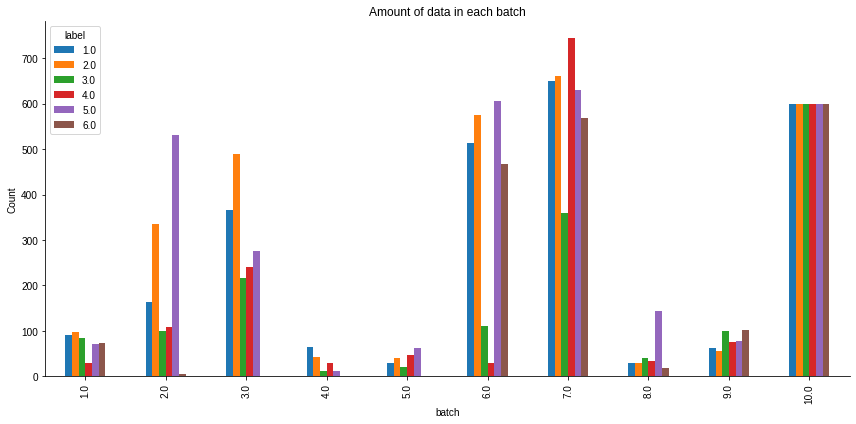

In [4]:
n_labels = np.unique(labels).shape[0]
df = pd.DataFrame()
for batch_num, (start, end) in enumerate(batch_ind):
    print(f"Batch {batch_num+1}: {end-start} samples")
    for label in range(n_labels):
        n_matching = (labels[start:end]==label).astype(np.long).sum()
        df = df.append({
            # add one to be consistent with original data indexing
            "label": label+1, 
            "batch": batch_num+1,
            "count": n_matching
        }, ignore_index=True)
        print(f"    gas {label+1}: {n_matching} samples")

df.pivot("batch", "label", "count").plot(kind='bar', figsize=(12, 6))
plt.ylabel("Count")
plt.title("Amount of data in each batch")
plt.show()

## Readings from a single odor class over time

A basic plot reveals temporal dynamics which do not depend on the 

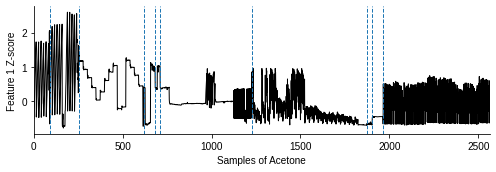

In [3]:
class_1_indices, = np.where(labels==0)
readings = features[class_1_indices]

x = np.arange(readings.shape[0])
feature_ids = [0]
n_plots = len(feature_ids)

fig, axes = plt.subplots(n_plots, 1, figsize=(7, 2.5), sharex=True)
if axes is not list:
    axes = [axes]
for plot_id, feat_id in enumerate(feature_ids):
    y = readings[:, feat_id]
    
    ax = axes[plot_id]
    ax.plot(x, y, c="black", linewidth=1)
    ax.set_ylabel(f"Feature {feat_id+1} Z-score")
    
    for start, _ in batch_ind:
        # Draw a line at the first sample whose index is equal to order greater than the batch start
        if start == 0:
            continue
        for sub_i, i in enumerate(class_1_indices):
            if i >= start:
                break
        ax.axvline(sub_i, linestyle='--', linewidth=1)
        
ax.set_xlabel("Samples of Acetone")
# plt.tight_layout()
fig.savefig("writeup/figure_sources/fig_1.svg")

numpy.ndarray

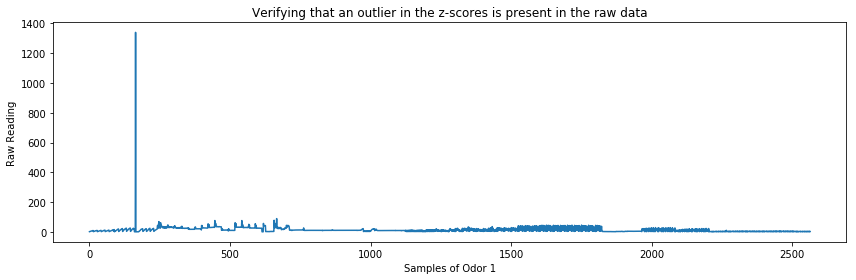

In [14]:
from preprocess import _load_raw_data
import matplotlib.pyplot as plt
import numpy as np

features, labels, batch_ind = _load_raw_data(include_gas_6=False)

anamolous_sensor = 1

readings = features[labels==0]
x = np.arange(readings.shape[0])
y = readings[:, anamolous_sensor]

plt.figure(figsize=(12, 4))
plt.plot(x, y)
plt.ylabel("Raw Reading")
plt.xlabel("Samples of Odor 1")
plt.title("Verifying that an outlier in the z-scores is present in the raw data")
plt.tight_layout()

## Identifying outliers
Print the index of any feature with a standard deviation of more than 5, and also print that feature value.

In [61]:
(features > 50).nonzero()

(array([ 663,  666,  666,  666,  666,  666,  666,  666,  812,  824,  824,
         824,  825,  825,  825,  825, 9871]),
 array([ 20,   1,  33,  36,  41,  44,  49,  57,  43,  20,  27,  28,  36,
         44, 100, 108,   9]))

## Visualizing features and labels for figures

x shape (10, 6, 10) y shape (10, 6)


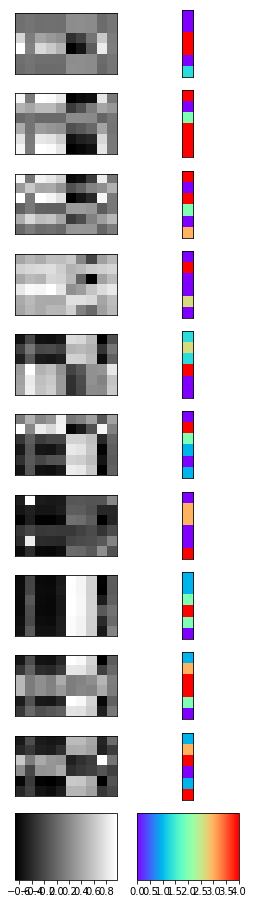

In [285]:
# Visualize features and labels from each batch

import numpy as np
import math
import cairo
from mpl_toolkits.axes_grid1 import make_axes_locatable
from batches import features, labels, batch_ind

n_samples = 6
n_feats = 10
batches = list(range(10))

x = []
y = []
for batch in batches:
    samp = np.random.choice(np.arange(*batch_ind[batch]), n_samples, replace=False)
    x.append(features[samp, :n_feats])
    y.append(labels[samp])
x = np.stack(x)
y = np.stack(y)
print("x shape", x.shape, "y shape", y.shape)

fig, axes = plt.subplots(len(batches)+1, 2, figsize=(4, 16))
for row in range(len(batches)+1):
    for col in range(2):
        ax = axes[row, col]
        if row == len(batches):
            if col == 0:
                plt.colorbar(im_gray, cax=ax, orientation="horizontal")
            else:
                plt.colorbar(im_color, cax=ax, orientation="horizontal")
            continue
        if col == 0:
            im_gray = ax.imshow(x[row], cmap="gray")
        else:
            im_color = ax.imshow(y[row].reshape(n_samples, 1), cmap="rainbow")
    #     divider = make_axes_locatable(ax)
    #     cax = divider.append_axes('top', size=0.5, pad=0.35)
        
        ax.set_xticks([])
        ax.set_yticks([])
# plt.colorbar(im_gray)
fig.savefig("writeup/fig_data_matrix_raw.svg", format="svg")

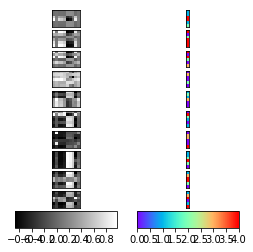

In [290]:
fig, axes = plt.subplots(len(batches)+1, 2, figsize=(4, 4))
for row in range(len(batches)+1):
    for col in range(2):
        ax = axes[row, col]
        if row == len(batches):
            if col == 0:
                plt.colorbar(im_gray, cax=ax, orientation="horizontal")
            else:
                plt.colorbar(im_color, cax=ax, orientation="horizontal")
            continue
        if col == 0:
            im_gray = ax.imshow(x[row], cmap="gray")
        else:
            im_color = ax.imshow(y[row].reshape(n_samples, 1), cmap="rainbow")
            im_color.set_clim(0.0, 4.0)
    #     divider = make_axes_locatable(ax)
    #     cax = divider.append_axes('top', size=0.5, pad=0.35)
        
        ax.set_xticks([])
        ax.set_yticks([])
# plt.colorbar(im_gray)
fig.savefig("writeup/fig_data_matrix_raw.svg", format="svg")

x shape (10, 5, 3, 10) y shape (10, 5, 3)


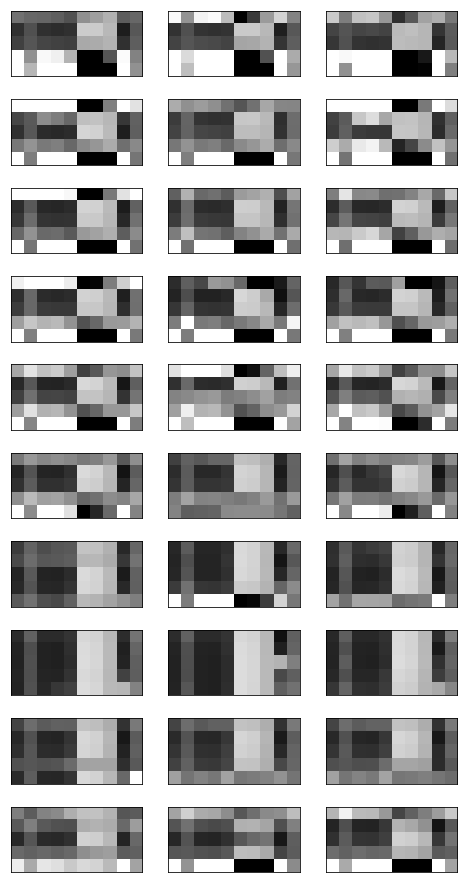

In [14]:
# Visualize features and labels from each batch
import matplotlib.pyplot as plt
import numpy as np
import math
import cairo
from mpl_toolkits.axes_grid1 import make_axes_locatable
from batches import features, labels, batch_ind, samples_in_batch_by_label, N_ODOR_CLASSES

n_feats = 10
batches = list(range(10))

x = []
y = []
k = 3
for batch in batches:
    xb = []
    yb = []
    for c in range(N_ODOR_CLASSES):
        choices = samples_in_batch_by_label[batch][c]
        samp = np.random.choice(choices, k, replace=False)
        xb.append(features[samp, :n_feats])
        yb.append(labels[samp])
    x.append(np.stack(xb))
    y.append(np.stack(yb))
# x shape (batches, classes, k, features)
# y shape (batches, classes, k,)
x = np.stack(x)
y = np.stack(y)
print("x shape", x.shape, "y shape", y.shape)

fig, axes = plt.subplots(x.shape[0], x.shape[2], figsize=(8, 16))
for batch in range(x.shape[0]):
    for samp in range(x.shape[2]):
        ax = axes[batch, samp]
        data = x[batch, :, samp]
        im_gray = ax.imshow(data, cmap="gray")
        im_gray.set_clim(-1.0, 1.0)

        ax.set_xticks([])
        ax.set_yticks([])
# plt.colorbar(im_gray)
fig.savefig("writeup/batch_matrix_raw.svg", format="svg")

# Basic classification techniques

## ANOVA

Here we run a one-way ANOVA to test the null hypothesis that the data from the different batches have the same mean. This analysis however makes the assumption that samples are independent which isn't evidently true looking at the plots above.

In [6]:
import scipy.stats

features_z = scipy.stats.zscore(features, axis=0)
unique_labels = np.unique(labels)
features_by_label = []
for label in unique_labels:
    features_by_label.append(features_z[labels==label])

scipy.stats.f_oneway

<function scipy.stats.stats.f_oneway(*args)>

## Principal Components

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from batches import split_all

pca = PCA(n_components=2)
new_features = pca.fit_transform(split_all.features)
print(pca.explained_variance_ratio_)




[0.52365805 0.15396908]


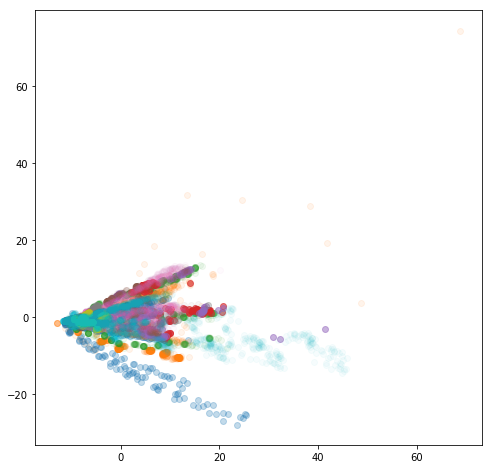

In [6]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
colors = list(mcolors.TABLEAU_COLORS)
for i, (start, end) in enumerate(split_all.batch_ind):
    batch = i+1
    batch = new_features[start:end]
    plt.scatter(batch[:, 0], batch[:, 1], color=colors[i], label=batch, alpha=100/(end-start))
# plt.legend()

## LDA

### Inference of the chemical from the features, within-batch

An LDA is able to discriminate odors within a batch (no generalization tested).

In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
print(labels.shape, features.shape)
batches_feats = [features[s:t] for s, t in batch_ind]
batches_label = [labels[s:t] for s, t in batch_ind]
batches_accuracy = []
batches_lda_models = []
for feats_batch, labels_batch in zip(batches_feats, batches_label):
    X = feats_batch
    y = labels_batch
    print(X.shape, y.shape)
    clf = LinearDiscriminantAnalysis()
    batches_lda_models.append(clf)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    accuracy = (y_pred==y).astype(np.long).sum().item() / y.shape[0]
    batches_accuracy.append(accuracy)
print("="*80)
for batch_i, accuracy in enumerate(batches_accuracy):
    print(f"Accuracy achieved by batch {batch_i}: {accuracy}")

(12077,) (12077, 128)
(371, 128) (371,)
(1239, 128) (1239,)
(1586, 128) (1586,)
(161, 128) (161,)
(197, 128) (197,)
(1833, 128) (1833,)
(3045, 128) (3045,)
(276, 128) (276,)
(369, 128) (369,)
(3000, 128) (3000,)
Accuracy achieved by batch 0: 1.0
Accuracy achieved by batch 1: 1.0
Accuracy achieved by batch 2: 0.9993694829760403
Accuracy achieved by batch 3: 1.0
Accuracy achieved by batch 4: 1.0
Accuracy achieved by batch 5: 0.9950900163666121
Accuracy achieved by batch 6: 0.9990147783251232
Accuracy achieved by batch 7: 1.0
Accuracy achieved by batch 8: 1.0
Accuracy achieved by batch 9: 0.9956666666666667


### Inference of the chemical from the features, within-batch (50/50 train/test split)

With a 50/50 train/test split, the LDA classifier succeeds to generalize to classify within-batch.

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
print(labels.shape, features.shape)
batches_feats = [features[s:t] for s, t in batch_ind]
batches_label = [labels[s:t] for s, t in batch_ind]
batches_sizes = [batch.shape[0] for batch in batches_label]
R_inds = [np.random.choice(np.arange(size), int(size/2)) for size in batches_sizes]
T_inds = [np.setdiff1d(np.arange(size), ind, assume_unique=True) for ind, size in zip(R_inds, batches_sizes)]
batches_feats_R = [feat[ind] for feat, ind in zip(batches_feats, R_inds)]
batches_label_R = [label[ind] for label, ind in zip(batches_label, R_inds)]
batches_feats_T = [feat[ind] for feat, ind in zip(batches_feats, T_inds)]
batches_label_T = [label[ind] for label, ind in zip(batches_label, T_inds)]
batches_lda_models = []
for feats_batch, labels_batch in zip(batches_feats_R, batches_label_R):
    X = feats_batch
    y = labels_batch
    print(X.shape, y.shape)
    clf = LinearDiscriminantAnalysis()
    batches_lda_models.append(clf)
    clf.fit(X, y)

# test    
batches_accuracy = []    
for feats_batch, labels_batch, clf in zip(batches_feats_T, batches_label_T, batches_lda_models):
    X = feats_batch
    y = labels_batch
    y_pred = clf.predict(X)
    accuracy = (y_pred==y).astype(np.long).sum().item() / y.shape[0]
    batches_accuracy.append(accuracy)

for batch_i, accuracy in enumerate(batches_accuracy):
    print(f"Accuracy achieved by batch {batch_i}: {accuracy}")

(12077,) (12077, 128)
(185, 128) (185,)
(619, 128) (619,)
(793, 128) (793,)
(80, 128) (80,)
(98, 128) (98,)
(916, 128) (916,)
(1522, 128) (1522,)
(138, 128) (138,)
(184, 128) (184,)
(1500, 128) (1500,)
Accuracy achieved by batch 0: 0.8454935622317596
Accuracy achieved by batch 1: 0.9787798408488063
Accuracy achieved by batch 2: 0.9947753396029259
Accuracy achieved by batch 3: 0.9791666666666666
Accuracy achieved by batch 4: 0.9646017699115044
Accuracy achieved by batch 5: 0.990036231884058
Accuracy achieved by batch 6: 0.9994609164420485
Accuracy achieved by batch 7: 0.9349112426035503
Accuracy achieved by batch 8: 0.9955555555555555
Accuracy achieved by batch 9: 0.9846238330587589


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [9]:
type(np.arange(5)[0].item())

int

### Inference of the chemical from the features, between-batch

Make a matrix between batches. This shows that, as you would expect, discriminators trained on one batch perform the best on themselves, followed by their neighbors.

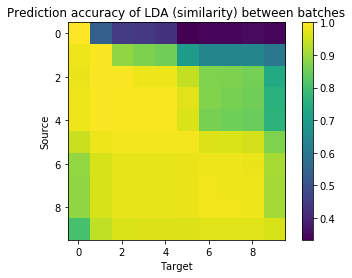

In [123]:
# Use the models trained in a previous cell
n_batches = len(batches_lda_models)
cross_accuracy = np.empty((n_batches, n_batches))
for i, model_i in enumerate(batches_lda_models):
    for j, (feats_batch_j, labels_batch_j) in enumerate(zip(batches_feats, batches_label)):
        X = feats_batch_j
        y = labels_batch_j
        y_pred = model_i.predict(X)
        accuracy = (y_pred==y).astype(np.long).sum().item() / y.shape[0]
        cross_accuracy[i, j] = accuracy

# plt.figure(figsize=(6, 8))
plt.imshow(cross_accuracy)
# plt.xticks(np.arange(n_batches), labels=np.arange(n_batches)+1)
# plt.yticks(np.arange(n_batches), labels=np.arange(n_batches)+1)
plt.title("Prediction accuracy of LDA (similarity) between batches")
plt.xlabel("Target")
plt.ylabel("Source")
plt.colorbar()


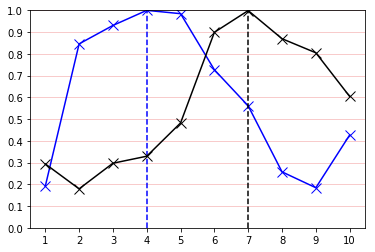

In [125]:
# Use the models trained in a previous cell
n_batches = len(batches_lda_models)
cross_accuracy = np.empty((n_batches, n_batches))
for i, model_i in enumerate(batches_lda_models):
    for j, (feats_batch_j, labels_batch_j) in enumerate(zip(batches_feats, batches_label)):
        X = feats_batch_j
        y = labels_batch_j
        y_pred = model_i.predict(X)
        accuracy = (y_pred==y).astype(np.long).sum().item() / y.shape[0]
        cross_accuracy[i, j] = accuracy

fig, ax = plt.subplots()
x = np.arange(1, 11)
# ax.plot(x, cross_accuracy[0], c="purple")
# ax.axvline(1, c="purple", linestyle="--")
ax.plot(x, cross_accuracy[3], c="blue", marker="x", markersize=10)
ax.axvline(4, c="blue", linestyle="--")
ax.plot(x, cross_accuracy[6], c="black", marker="x", markersize=10)
ax.axvline(7, c="black", linestyle="--")
ax.set_xticks(x)
ax.set_ylim([0.0, 1.0])
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.grid(axis='y', color='#F7BFBE')
fig.savefig("writeup/lda_centers.png")

### Inference of chemical from the features, all the data

Can a single LDA model classify every smell in all the batches? Random 50/50 train/test split.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

size = features.shape[0]
R_ind = np.random.choice(np.arange(size), int(size/2))
T_ind = np.setdiff1d(np.arange(size), R_ind, assume_unique=True) 
batches_feats_R = features[R_ind]
batches_label_R = labels[R_ind]
batches_feats_T = features[T_ind]
batches_label_T = labels[T_ind]

X = batches_feats_R
y = batches_label_R
print(X.shape, y.shape)
clf = LinearDiscriminantAnalysis()
batches_lda_models.append(clf)
clf.fit(X, y)

# test    
accuracy = []
X = batches_feats_T
y = batches_label_T
y_pred = clf.predict(X)
accuracy = (y_pred==y).astype(np.long).sum().item() / y.shape[0]

print(f"Accuracy achieved: {accuracy}")

(6955, 128) (6955,)
Accuracy achieved: 0.948371817643576


## Train on 1..T-1, test on T
For each batch number T=1...9, (0-indexed) train an LDA model on batch 0..T-1; then evaluate on batch T

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from batches import split_all

features, labels, batch_ind = split_all.features, split_all.labels, split_all.batch_ind

print(labels.shape, features.shape)

# batches_X[T] contains all data 0...T (including batch T) (0-indexed) 
batches_feats = [features[0:t] for s, t in batch_ind]
batches_label = [labels[0:t] for s, t in batch_ind]
batches_accuracy = []
batches_lda_models = []
for feats_batch, labels_batch in zip(batches_feats, batches_label):
    X = feats_batch
    y = labels_batch
    print(X.shape, y.shape)
    clf = LinearDiscriminantAnalysis()
    batches_lda_models.append(clf)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    accuracy = (y_pred==y).astype(np.long).sum().item() / y.shape[0]
    batches_accuracy.append(accuracy)
print("="*80)
for batch_i, accuracy in enumerate(batches_accuracy):
    print(f"Accuracy achieved by batch {batch_i}: {accuracy}")

(12077,) (12077, 128)
(371, 128) (371,)
(1610, 128) (1610,)
(3196, 128) (3196,)
(3357, 128) (3357,)
(3554, 128) (3554,)
(5387, 128) (5387,)
(8432, 128) (8432,)
(8708, 128) (8708,)
(9077, 128) (9077,)
(12077, 128) (12077,)
Accuracy achieved by batch 0: 1.0
Accuracy achieved by batch 1: 0.9962732919254659
Accuracy achieved by batch 2: 0.9949937421777222
Accuracy achieved by batch 3: 0.9940422996723265
Accuracy achieved by batch 4: 0.994091164884637
Accuracy achieved by batch 5: 0.9894189715982922
Accuracy achieved by batch 6: 0.9837523719165086
Accuracy achieved by batch 7: 0.9838079926504364
Accuracy achieved by batch 8: 0.9842458962212185
Accuracy achieved by batch 9: 0.9605862383042146


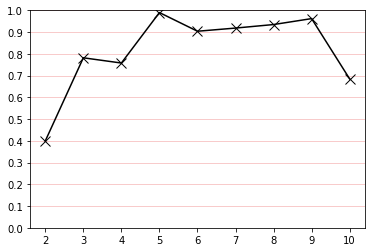

In [121]:
# batches_lda_models[t] is trained on batches 0...t
# so test on batch t+1=T
batches = []
accuracies = []
for T in range(1, 10):
    model = batches_lda_models[T-1]
    
    start, end = batch_ind[T]
    X = features[start:end]
    y = labels[start:end]

    y_pred = model.predict(X)
    accuracy = (y_pred==y).astype(np.long).sum().item() / y.shape[0]
    
    accuracies.append(accuracy)
    batches.append(T + 1)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(batches, accuracies, color="black", marker="x", markersize=10)
ax.set_xticks(batches)
ax.set_ylim([0.0, 1.0])
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.grid(axis='y', color='#F7BFBE')


fig.savefig("writeup/lda_up_to.png")

# Neural Network Classifiers

## Training curves

### Early stopping pretraining

In [83]:
# data_folder = "output/backprop_context_earlystop_share2"
data_folder = "output/backprop_context_patientearlystop_epoch1"
# data_folder = "backprop_context_patientearlystop_share_epoch0"

Stop time for T=3: 0
Stop time for T=4: 0
Stop time for T=5: 0
Stop time for T=6: 0
Stop time for T=7: 0
Stop time for T=8: 0
Stop time for T=9: 0


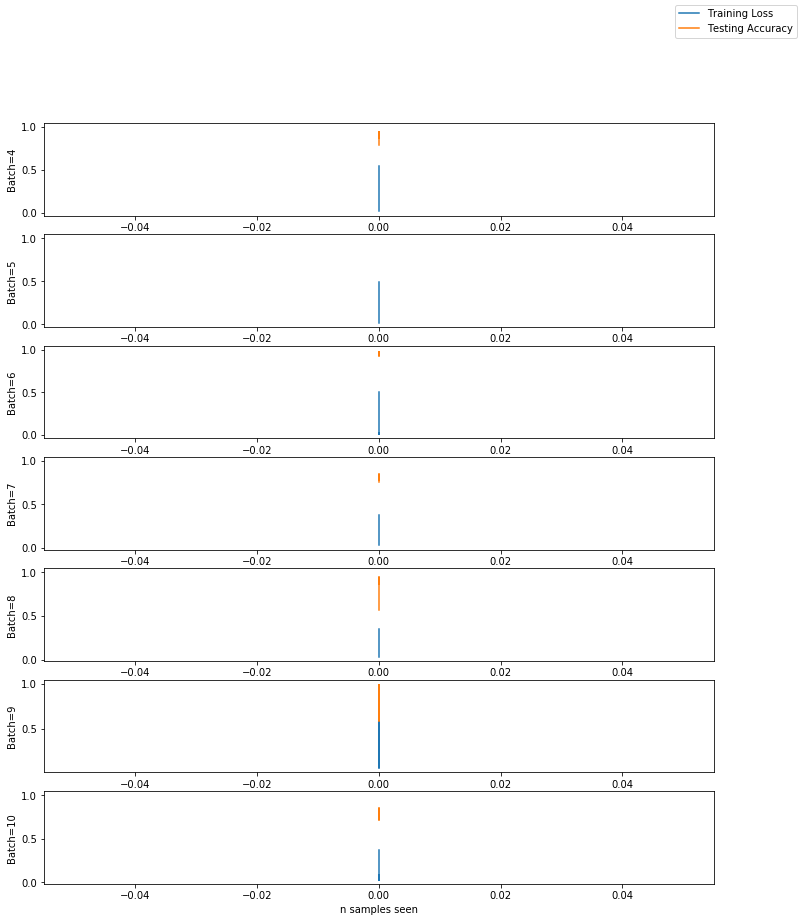

In [84]:
import matplotlib.pyplot as plt
import torch
import os

Ts = list(range(3, 10))
samp_max = 20
fig, axes = plt.subplots(len(Ts), 1, figsize=(12, 2*len(Ts)))
for T, ax in zip(Ts, axes):
    lloss = torch.load(os.path.join(data_folder, f"val_lloss_{T}.pt"))
    lacc = torch.load(os.path.join(data_folder, f"val_lacc_{T}.pt"))
    li = torch.load(os.path.join(data_folder, f"val_li_{T}.pt"))
    stop_time = torch.load(os.path.join(data_folder, f"val_stop_time_{T}.pt"))
    print(f"Stop time for T={T}: {stop_time}")
    ax.set_ylabel(f"Batch={T+1}")
    line_loss, = ax.plot(li[:samp_max], lloss[:samp_max])
    line_acc, = ax.plot(li[:samp_max], lacc[:samp_max])
    ax.hlines(1.0, 0, max(li[:samp_max]), linestyles="dashed")
    
ax.set_xlabel("n samples seen")
    
fig.legend([line_loss, line_acc], ["Training Loss", "Testing Accuracy"], loc="upper right")

# [Context is sequences ] [T=4]


In [85]:
for i, acc in enumerate(lacc[0:20]):
    print(f"{acc}")


patience = 10
consec = 0
last_best = float('-inf')
last_best_i = 0
for i, k in enumerate(lacc):
    if k > last_best:
        print(f"better i={i}")
        last_best = k
        consec = 0
        last_best_i = i
    else:
        consec += 1
        if consec >= patience:
            print(f"Violated patience at i={i}")
            consec = 0
print(last_best_i)

0  0.7246666666666667
1  0.83
2  0.7806666666666666
3  0.8153333333333334
4  0.7873333333333333
5  0.8513333333333334
6  0.808
7  0.7106666666666667
8  0.8093333333333333
9  0.7953333333333333
10  0.8453333333333334
better i=0
better i=1
better i=5
5


### Final training

In [10]:
data_folder = "output/nocontext_schedule1"

NameError: name 'data_folder' is not defined

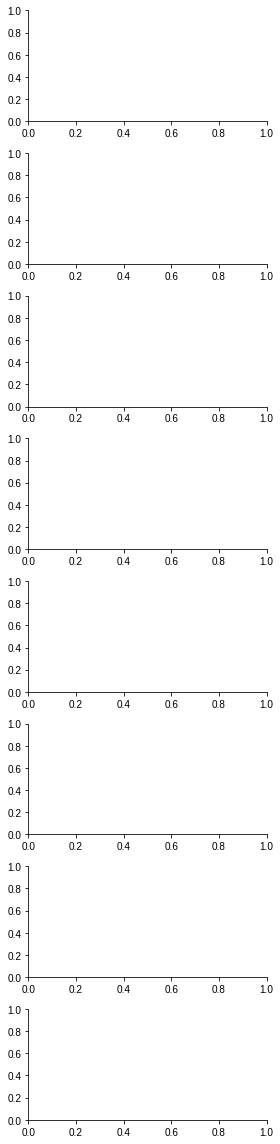

In [3]:
# Accuracy over time graph
import torch
import os

Ts = list(range(2, 10))
fig, axes = plt.subplots(len(Ts), 1, figsize=(4, 16))
for T, ax in zip(Ts, axes):
    lloss = torch.load(os.path.join(data_folder, f"lloss_{T}.pt"))
    lacc = torch.load(os.path.join(data_folder, f"lacc_{T}.pt"))
    li = torch.load(os.path.join(data_folder, f"li_{T}.pt"))
    
    ax.set_ylabel(f"Batch={T+1}")
    line_loss, = ax.plot(li, lloss)
    line_acc, = ax.plot(li, lacc)
    ax.hlines(1.0, 0, max(li), linestyles="dashed")
    
ax.set_xlabel("n samples seen")
    
fig.legend([line_loss, line_acc], ["Training Loss", "Testing Accuracy"], loc="upper right")

# [Context is sequences ] [T=4]


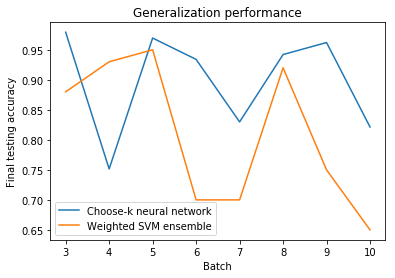

In [41]:
# Final accuracies

import matplotlib.pyplot as plt
import torch
import os

vergara_eyeballed = [1.0, 0.74, 0.88, 0.93, 0.95, 0.70, 0.70, 0.92, 0.75, 0.65]

Ts = list(range(2, 10))
batches = [t+1 for t in Ts]
accs = []
for T, ax in zip(Ts, axes):
    acc = torch.load(os.path.join(data_folder, f"acc_{T}.pt"))
    accs.append(acc)
    
plt.plot(batches, accs, label="Choose-k neural network")
plt.plot(batches, vergara_eyeballed[2:], label="Weighted SVM ensemble")

plt.title("Generalization performance")
plt.xlabel("Batch")
plt.ylabel("Final testing accuracy")
plt.legend()


## Adjustable accuracy plots

In [28]:
# Default Parameters
show_legend = True
draw_errors = True
draw_plot = False
show_scatter = False
draw_axis = False
show_svm = False
use_offset = False
show_vergara = False
save_figure = False


#data_folders = ([f"output/backprop{n}" for n in range(10)],
#                [f"output/backprop_dropout{n}" for n in range(10)])
#dataset_names = ("Backprop", "Backprop+Dropout")

# data_folders = ([f"output/backprop{n}" for n in range(10)],
#                 [f"output/evolve{n}" for n in range(10)],
#                 [f"output/backprop_ensemble{n}" for n in range(10)])
# dataset_names = ("With Context", "Evolve With Context", "Ensemble")

# data_folders = ([f"output/backprop{n}" for n in range(10)],
#                 [f"output/evolve{n}" for n in range(10)],
#                 [f"output/evolve_uber{n}" for n in range(10)])
# dataset_names = ("Backprop", "Evolve (old)", "Evolve (new)")

# data_folders = ([f"output/backprop{n}" for n in range(10)],)
# dataset_names = ("Context Model",)


# data_folders = ([f"output/ensemble_long{n}" for n in range(3)],
#                 [f"output/nocontext_long{n}" for n in range(3)],
#                 [f"/media/jamie/PATRIOT/sensor-drift_bak/output/backprop{n}" for n in range(10)],
#                 [f"/media/jamie/PATRIOT/sensor-drift_bak/output/backprop_context_earlystop_share{n}" for n in range(3)],
# )
# dataset_names = ("Ensemble",
#                 "NoContext",
#                 "Context",
#                 "ContextShare"
#     )


# FIGURE 2B parametrrs
# data_folders = ([f"output/nocontext_long{n}" for n in range(3)],)
# dataset_names = ("Context Model",)
# figure_path = "writeup/figure_sources/feedforward_accuracy.png"

# FIGURE 3 parametrrs
# data_folders = ([f"output/ensemble_long{n}" for n in range(3)],)
# dataset_names = ("Ensemble Model",)
# figure_path = "writeup/figure_sources/ensemble_accuracy.png"
# show_svm = True

# FIGURE 4B parametrrs
# data_folders = ([f"output/context_long{n}" for n in range(3)],)
# dataset_names = ("Context",)
# figure_path = "writeup/figure_sources/context_accuracy.png"

# FIGURE 4C parametrrs
# data_folders = ([f"output/context_share_long{n}" for n in range(3)],)
# dataset_names = ("Context Share")
# figure_path = "writeup/figure_sources/context_share_accuracy.png"

# 
# n_trial = 5
# data_folders = (
#     [f"output/nocontext_medium{n}" for n in range(n_trial)],
#     [f"output/context_medium{n}" for n in range(n_trial)]
# )
# dataset_names = [
#     "NoContext",
#     "Context",
# ]


n_trial = 30
subselection = None #[2, -1]
data_folders = ([f"output/ensemble_harddecay{n}" for n in range(n_trial)],
                [f"output/nocontext_harddecay{n}" for n in range(n_trial)],
                [f"output/context_harddecay_k1{n}" for n in range(n_trial)],
                [f"output/context_lstm_harddecay{n}" for n in range(n_trial)],
                [f"output/context_harddecay_relu{n}" for n in range(n_trial)],
                [f"output/nocontext_big_short_harddecay{n}" for n in range(n_trial)]
)
# data_folders = ([f"output/ensemble_short_harddecay{n}" for n in range(n_trial)],
#                 [f"output/nocontext_short_harddecay{n}" for n in range(n_trial)],
#                 [f"output/context_short_harddecay{n}" for n in range(n_trial)],
#                 [f"output/context_lstm_short_harddecay{n}" for n in range(n_trial)],
#                 [f"output/context_short_harddecay_relu{n}" for n in range(n_trial)],
# )

dataset_names = ["Feedforward NN Ensemble",
                "Feedforward NN",
                "Feedforward+Context NN",
                "LSTM",
                "Context relu",
                 "Feedforward+Context NN Big"
    ]
if subselection is not None:
    data_folders = [data_folders[idx] for idx in subselection]
    dataset_names = [dataset_names[idx] for idx in subselection]

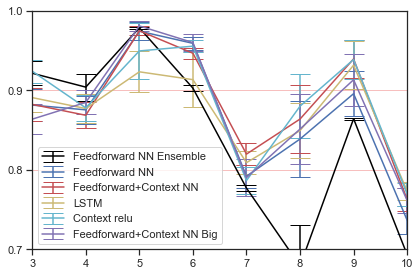

In [29]:

# Final accuracies

all_points = []

Ts = list(range(2, 10))
batches = [t+1 for t in Ts]

# For each method, for each batch, for each n, there is an accuracy
df = pd.DataFrame(columns=["method", "batch", "n", "accuracy"])
for method_i, method_folders in enumerate(data_folders):
    for T, batch in zip(Ts, batches):
        for n, n_folder in enumerate(method_folders):
            try:
                acc = torch.load(os.path.join(n_folder, f"acc_{T}.pt"))
            except FileNotFoundError:
                print("not found", dataset_names[method_i], "T=", T)
            df = df.append({
                "method": method_i,
                "batch": batch,
                "n": n,
                "accuracy": acc
            }, ignore_index=True)
if show_svm:
    method_i += 1
    print("method_i", method_i)
    if "SVM Ensemble" not in dataset_names:
        dataset_names.append("SVM Ensemble")
    dirpath = "svm_ensemble_results/setting2"
    for trial in range(n_trial):
        try:
            with open(os.path.join(dirpath, f"accuracies_trial{trial}.pkl"), "rb") as f:
                accs = pickle.load(f)
        except FileNotFoundError:
            print("not found", dataset_names[method_i], "T=", T)
        accs = accs[-len(batches):]
        for i, batch in enumerate(batches):
            acc = accs[i]
            df = df.append({
                "method": method_i,
                "batch": batch,
                "n": trial,
                "accuracy": acc
            }, ignore_index=True)

# For each method, for each batch, calculate the mean and 95% confidence interval
df2 = pd.DataFrame(columns=["method", "batch", "mu", "err"])
for method_index, method_name in enumerate(dataset_names):
    for T, batch in zip(Ts, batches):
        data = df[(df.method==method_index) & (df.batch==batch)].accuracy
        try:
            err = 1.96 * data.std() / math.sqrt(data.count())
        except ZeroDivisionError:
            print(method_name, data, "T=", T, data, method_index)
            continue
        df2 = df2.append({
            "method": method_index,
            "batch": batch,
            "mu": data.mean().item(),
            "err": err.item()
        }, ignore_index=True)
        
if use_offset:
    OFFSET = 0.15
else:
    OFFSET = 0.0

colors = ("black", "b", "r", "y", "c", "m", "k")
markers = ("$\u25EF$", "$\u25EF$", "v", "v", "*", "*")

fig, ax = plt.subplots(1, 1)

for i in sorted(df2.method.unique()):
    i = int(i)
    off = OFFSET if draw_errors or draw_plot else 0.0
    m = df[df.method == i]
    
    # Scatter plot the accuracies
    if show_scatter:
        ax.scatter(
            x=m.batch-off,
            y=m.accuracy,
            marker=markers[i],
            s=100,
            label=dataset_names[i],
            c=colors[i])
    
    # Error bars
    if draw_errors:
        ax.errorbar(
            x=df2[df2.method == i].batch,
            y=df2[df2.method == i].mu,
            yerr=df2[df2.method == i].err,
            c=colors[i],
            label=dataset_names[i],
            capsize=10)
    
    # Line
    if draw_plot:
        ax.plot(
            df2[df2.method == i].batch,
            df2[df2.method == i].mu,
            c=colors[i],
            markersize=10)

if show_vergara:
    vergara_eyeballed = [1.0, 0.74, 0.88, 0.93, 0.95, 0.70, 0.70, 0.92, 0.75, 0.65]
    ax.plot(batches, vergara_eyeballed[2:],
            linestyle='--', c="g", marker="$\u25EF$", label="Weighted SVM ensemble")

ax.set_ylim([0.0, 1.1])
if draw_axis:
    plt.xlabel("Batch")
    plt.ylabel("Test Accuracy")
    
# Legend
if show_legend:       
    plt.legend()

ax.set_xticks(np.arange(3, 11))
    
ax.set_ylim([0.7, 1.0])
ax.set_yticks(np.arange(0.7, 1.0, 0.1))
ax.grid(axis='y', color='#F7BFBE')

plt.show()
if save_figure:
    fig.savefig(figure_path)

## Results Figure

In [20]:
n_trial = 30
data_folders = (
    [f"output/nocontext_harddecay{n}" for n in range(n_trial)],
    [f"output/context_harddecay_k1{n}" for n in range(n_trial)],
    [f"output/ensemble_harddecay{n}" for n in range(n_trial)],            
    [f"output/context_lstm_harddecay{n}" for n in range(n_trial)],
)
dataset_names = [
    "Feedforward NN",
    "Feedforward+Context NN",
    "Feedforward NN Ensemble",
    "LSTM",
]
# Default Parameters
show_legend = True
draw_errors = True
draw_plot = False
show_scatter = False
draw_axis = False
show_svm = True
use_offset = False
show_vergara = False
save_figure = False


method_i 3
SVM Ensemble Series([], Name: accuracy, dtype: float64) T= 2 Series([], Name: accuracy, dtype: float64) 4
SVM Ensemble Series([], Name: accuracy, dtype: float64) T= 3 Series([], Name: accuracy, dtype: float64) 4
SVM Ensemble Series([], Name: accuracy, dtype: float64) T= 4 Series([], Name: accuracy, dtype: float64) 4
SVM Ensemble Series([], Name: accuracy, dtype: float64) T= 5 Series([], Name: accuracy, dtype: float64) 4
SVM Ensemble Series([], Name: accuracy, dtype: float64) T= 6 Series([], Name: accuracy, dtype: float64) 4
SVM Ensemble Series([], Name: accuracy, dtype: float64) T= 7 Series([], Name: accuracy, dtype: float64) 4
SVM Ensemble Series([], Name: accuracy, dtype: float64) T= 8 Series([], Name: accuracy, dtype: float64) 4
SVM Ensemble Series([], Name: accuracy, dtype: float64) T= 9 Series([], Name: accuracy, dtype: float64) 4


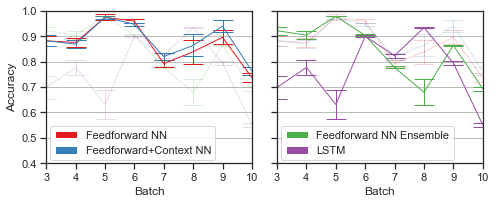

In [18]:

# Final accuracies

all_points = []

Ts = list(range(2, 10))
batches = [t+1 for t in Ts]

# For each method, for each batch, for each n, there is an accuracy
df = pd.DataFrame(columns=["method", "batch", "n", "accuracy"])
for method_i, method_folders in enumerate(data_folders):
    for T, batch in zip(Ts, batches):
        for n, n_folder in enumerate(method_folders):
            try:
                acc = torch.load(os.path.join(n_folder, f"acc_{T}.pt"))
            except FileNotFoundError:
                print("not found", dataset_names[method_i], "T=", T)
            df = df.append({
                "method": method_i,
                "batch": batch,
                "n": n,
                "accuracy": acc
            }, ignore_index=True)
if show_svm:
    method_i += 1
    print("method_i", method_i)
    if "SVM Ensemble" not in dataset_names:
        dataset_names.append("SVM Ensemble")
    dirpath = "svm_ensemble_results/setting2"
    for trial in range(n_trial):
        try:
            with open(os.path.join(dirpath, f"accuracies_trial{trial}.pkl"), "rb") as f:
                accs = pickle.load(f)
        except FileNotFoundError:
            print("not found", dataset_names[method_i], "T=", T)
        accs = accs[-len(batches):]
        for i, batch in enumerate(batches):
            acc = accs[i]
            df = df.append({
                "method": method_i,
                "batch": batch,
                "n": trial,
                "accuracy": acc
            }, ignore_index=True)

# For each method, for each batch, calculate the mean and 95% confidence interval
df2 = pd.DataFrame(columns=["method", "batch", "mu", "err"])
for method_index, method_name in enumerate(dataset_names):
    for T, batch in zip(Ts, batches):
        data = df[(df.method==method_index) & (df.batch==batch)].accuracy
        try:
            err = 1.96 * data.std() / math.sqrt(data.count())
        except ZeroDivisionError:
            print(method_name, data, "T=", T, data, method_index)
            continue
        df2 = df2.append({
            "method": method_index,
            "batch": batch,
            "mu": data.mean().item(),
            "err": err.item()
        }, ignore_index=True)
        
if use_offset:
    OFFSET = 0.15
else:
    OFFSET = 0.0

colors = ("#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00")
markers = ("$\u25EF$", "$\u25EF$", "v", "v", "*", "*")

fig, axes = plt.subplots(1, 2, figsize=(7.05, 3), sharey=True)
highlights = [[0, 1], [2, 3]]
for ax, highlight in zip(axes, highlights):

    for i in sorted(df2.method.unique()):
        i = int(i)
        off = OFFSET if draw_errors or draw_plot else 0.0
        m = df[df.method == i]

        # Scatter plot the accuracies
        if show_scatter:
            ax.scatter(
                x=m.batch-off,
                y=m.accuracy,
                marker=markers[i],
                s=100,
                label=dataset_names[i],
                c=colors[i])

        # Error bars
        if i in highlight:
            alpha = 1.0
        else:
            alpha = 0.2
        if draw_errors:
            ax.errorbar(
                x=df2[df2.method == i].batch,
                y=df2[df2.method == i].mu,
                yerr=df2[df2.method == i].err,
                c=colors[i],
                label=dataset_names[i],
                capsize=10,
                linewidth=1,
                elinewidth=1,
                capthick=1,
                alpha=alpha)

        # Line
        if draw_plot:
            ax.plot(
                df2[df2.method == i].batch,
                df2[df2.method == i].mu,
                c=colors[i],
                markersize=10)

if show_vergara:
    vergara_eyeballed = [1.0, 0.74, 0.88, 0.93, 0.95, 0.70, 0.70, 0.92, 0.75, 0.65]
    ax.plot(batches, vergara_eyeballed[2:],
            linestyle='--', c="g", marker="$\u25EF$", label="Weighted SVM ensemble")

ax.set_ylim([0.0, 1.1])
if draw_axis:
    plt.xlabel("Batch")
    plt.ylabel("Test Accuracy")
    
# Legend
import matplotlib.patches as patches
legend_rectangles = []
legend_lables = []
for method_i in sorted(df2.method.unique()):
    method_i = int(method_i)
    legend_lables.append(dataset_names[method_i])
    rect = patches.Rectangle((0, 0), 1, 1, facecolor=colors[method_i])
    legend_rectangles.append(rect)
axes[0].legend(legend_rectangles[:2], legend_lables[:2], loc=(0.02, 0.02))
axes[1].legend(legend_rectangles[2:], legend_lables[2:], loc=(0.02, 0.02))

# Axes and ticks
axes[0].set_xticks(np.arange(3, 11))
axes[1].set_xticks(np.arange(3, 11))
    
ax.set_ylim([0.4, 1.0])
ax.set_yticks(np.arange(0.4, 1.05, 0.1))
axes[0].set_ylabel("Accuracy")
axes[0].grid(axis='y', color='#bbbbbb')
axes[1].grid(axis='y', color='#bbbbbb')
axes[0].set_xlabel("Batch")
axes[1].set_xlabel("Batch")

plt.show()
figure_path = "writeup/figure_sources/fig_3.svg"
fig.savefig(figure_path)

In [88]:
pd.__version__

'0.23.4'

## Statistical tests

These require the "df" and "df2" variables to be present from the previous cells.

In [31]:
import pingouin as pg

# First test: For each batch, run an ANOVA for methods considered
# This will be used to selectively bold results in the table
if False:
    print("#" * 80)
    print("### ANOVA, pairwise t-tests for each batch")
    print("#" * 80)
    for batch in range(3, 11):
        df_batch = df[df.batch == batch]
        print()
        print(f"### batch {batch}:")
        aov = pg.welch_anova(
            dv='accuracy',
            between='method',
            data=df_batch
        )
        print("ANOVA:")
        print(aov)

        pgs = pg.pairwise_ttests(
            data=df_batch,
            dv='accuracy',
            between='method',
            correction=True
        )  
        print("Pairwise TTests:")
        print(pgs)
    print()
    
# Second test: Run an ANOVA for the grand means
print("#" * 80)
print("### Second test")
print("#" * 80)

# Third test: Run an ANOVA for the grand means, blocked by batch
print("#" * 80)
print("### Significance test for context, no context")
print("#" * 80)
context_index = dataset_names.index("Feedforward+Context NN")
nocontext_index = dataset_names.index("Feedforward NN")
df_context = df[(df.method == context_index) | (df.method == nocontext_index)]
aov = pg.anova(
    dv='accuracy',
    between=['method', 'batch'],
    data=df_context
)
print("ANOVA:")
print(aov)

if False:
    print("#" * 80)
    print("### Significance test for context, no context, by batch")
    print("#" * 80)
    for batch in range(3, 11):
        print()
        print(f"### batch {batch}:")
        df_batch = df_context[df.batch == batch]
        pgs = pg.pairwise_ttests(
            data=df_batch,
            dv='accuracy',
            between='method',
            correction=True
        )  
        print("Pairwise TTests:")
        print(pgs)
    print()

    
pgs = pg.pairwise_ttests(
    data=df,
    dv='accuracy',
    between=['method'],
    correction=True
)  
print("Pairwise TTests:")
print(pgs)

# Did LSTM outperform RNN?
print("#" * 80)
print("### Significance test for context, LSTM")
print("#" * 80)
context_index = dataset_names.index("Feedforward+Context NN")
lstm_index = dataset_names.index("LSTM")
df_context = df[(df.method == context_index) | (df.method == lstm_index)]
aov = pg.anova(
    dv='accuracy',
    between=['method', 'batch'],
    data=df_context
)
print("ANOVA:")
print(aov)


# Did the large RNN outperform the other one?
print("#" * 80)
print("### Significance test for context, big context")
print("#" * 80)
context_index = dataset_names.index("Feedforward+Context NN")
large_context_index = dataset_names.index("Feedforward+Context NN Big")
df_context = df[(df.method == context_index) | (df.method == large_context_index)]
aov = pg.anova(
    dv='accuracy',
    between=['method', 'batch'],
    data=df_context
)
print("ANOVA:")
print(aov)


print("#" * 80)
print("### Significance test for SVM ensemble, NN ensemble")
print("#" * 80)
id_1 = dataset_names.index("Feedforward NN Ensemble")
id_2 = dataset_names.index("SVM Ensemble")
df_context = df[(df.method == id_1) | (df.method == id_2)]
aov = pg.anova(
    dv='accuracy',
    between=['method', 'batch'],
    data=df_context
)
print("ANOVA:")
print(aov)


# Third test: Run an ANOVA for the grand means, blocked by batch
print("#" * 80)
print("### Significance test for context, no context")
print("#" * 80)


################################################################################
### Second test
################################################################################
################################################################################
### Significance test for context, no context
################################################################################
ANOVA:
           Source     SS   DF     MS          F         p-unc       np2
0          method  0.021    1  0.021   5.294861  2.183088e-02  0.011283
1           batch  2.334    7  0.333  84.069429  1.781386e-78  0.559139
2  method * batch  0.042    7  0.006   1.529066  1.551741e-01  0.022548
3        Residual  1.840  464  0.004        NaN           NaN       NaN
Pairwise TTests:
   Contrast    A    B  Paired  Parametric      T     dof       Tail     p-unc  \
0    method  0.0  1.0   False        True -2.922  464.78  two-sided  0.003644   
1    method  0.0  2.0   False        True -4.443  442.42  two-sided 

ValueError: 'SVM Ensemble' is not in list

## Print Table 1

In [27]:
# Final accuracies

import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
import math
from tabulate import tabulate

all_points = []

Ts = list(range(2, 10))
batches = [t+1 for t in Ts]

# For each method, for each batch, for each n, there is an accuracy
df = pd.DataFrame(columns=["method", "batch", "n", "accuracy"])
for method_i, method_folders in enumerate(data_folders):
    for T, batch in zip(Ts, batches):
        for n, n_folder in enumerate(method_folders):
            try:
                acc = torch.load(os.path.join(n_folder, f"acc_{T}.pt"))
            except FileNotFoundError:
                print("not found", dataset_names[method_i], "T=", T)
            df = df.append({
                "method": method_i,
                "batch": batch,
                "n": n,
                "accuracy": acc
            }, ignore_index=True)
if show_svm:
    method_i += 1
    if "SVM Ensemble" not in dataset_names:
        dataset_names.append("SVM Ensemble")
    dirpath = "svm_ensemble_results/setting2"
    for trial in range(n_trial):
        try:
            with open(os.path.join(dirpath, f"accuracies_trial{trial}.pkl"), "rb") as f:
                accs = pickle.load(f)
        except FileNotFoundError:
            print("not found", dataset_names[method_i], "T=", T)
        accs = accs[-len(batches):]
        for i, batch in enumerate(batches):
            acc = accs[i]
            df = df.append({
                "method": method_i,
                "batch": batch,
                "n": trial,
                "accuracy": acc
            }, ignore_index=True)

# For each method, for each batch, calculate the mean and 95% confidence interval
df2 = pd.DataFrame(columns=["method", "batch", "mu", "err"])
for method_index, method_name in enumerate(dataset_names):
    for T, batch in zip(Ts, batches):
        data = df[(df.method==method_index) & (df.batch==batch)].accuracy
        try:
            err = 1.96 * data.std() / math.sqrt(data.count())
        except ZeroDivisionError:
            print(method_name, data, "T=", T)
            continue
        df2 = df2.append({
            "method": method_index,
            "batch": batch,
            "mu": data.mean().item(),
            "err": err.item()
        }, ignore_index=True)
        
# Compute a grand total mean and 95% CI
for method_index, method_name in enumerate(dataset_names):
    data = df[(df.method==method_index) & (df.batch>=3)].accuracy
    try:
        err = 1.96 * data.std() / math.sqrt(data.count())
    except ZeroDivisionError:
        print(method_name, data)
        continue
    df2 = df2.append({
        "method": method_index,
        "batch": "$\mu",
        "mu": data.mean().item(),
        "err": err.item()
    }, ignore_index=True)


draw_errors = False
headers = list(range(3, 11)) + ["$\mu$"]
table = []
for i in sorted(df2.method.unique()):
    i = int(i)
    off = OFFSET if draw_errors else 0.0
    means = df2[df2.method == i].mu.tolist()
    errs = df2[df2.method == i].err.tolist()
#     means.append(np.mean(means))
    if draw_errors:
        row = [f"{means[j]:.3f} $\pm$ {errs[j]:.3f}" for j in range(len(means))]
    else:
        row = [f"{means[j]:.3f}" for j in range(len(means))]
    row.insert(0, dataset_names[i])
    table.append(row)
headers.insert(0, "Batch")


# bold the largest value in each column
for column_id, _ in enumerate(table[0]):
    if column_id == 0:
        continue
    max_row_id = -1
    max_row_val = -np.inf
    for row_id, _ in enumerate(table):
        val = float(table[row_id][column_id])
        if val > max_row_val:
            max_row_id = row_id
            max_row_val = val
    table[max_row_id][column_id] = f"\\textbf{{{max_row_val:.3f}}}"

print(tabulate(table, headers, tablefmt="latex_raw", floatfmt=".3f"))


# How much improvement did the Context model have over NoContext?
print()
print("Average accuracy over all batches:")
indices = [0, 1, 2, 3, 4]
for i in indices:
    means = df2[df2.method == i].mu.tolist()
    avg = np.mean(means)
    print(f"{dataset_names[i]}: {avg}")



\begin{tabular}{llllllllll}
\hline
 Batch                   & 3              & 4              & 5              & 6              & 7              & 8              & 9              & 10             & $\mu$          \\
\hline
 Feedforward NN Ensemble & 0.921          & \textbf{0.904} & 0.979          & 0.903          & 0.777          & 0.679          & 0.864          & 0.693          & 0.840          \\
 Feedforward NN          & 0.881          & 0.875          & 0.974          & 0.959          & 0.792          & 0.839          & 0.896          & 0.737          & 0.869          \\
 Feedforward+Context NN  & 0.882          & 0.869          & 0.975          & 0.947          & \textbf{0.820} & 0.864          & \textbf{0.939} & 0.763          & 0.882          \\
 LSTM                    & 0.891          & 0.877          & 0.923          & 0.913          & 0.809          & 0.849          & 0.932          & \textbf{0.773} & 0.871          \\
 Context relu            & \textbf{0.924} & 0.878    

## Print Table 2

In [4]:
from main_backprop_context import ContextModel
from main_backprop_nocontext import NoContextModel

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Number of parameters:")
    
context_model = ContextModel(k=1)
print(f"Context Model: {count_parameters(context_model)}")

no_context_model = NoContextModel()
print(f"No Context Model: {count_parameters(no_context_model)}")


Number of parameters:
Context Model: 14315
No Context Model: 7575


In [6]:
# Find the size of a No Context model with equal # parameters to the Context Modle
n_context_parameters = count_parameters(ContextModel(k=1))

n_nocontext_parameters = 0
skill_size = 20
while n_nocontext_parameters < n_context_parameters:
    skill_size += 1
    n_nocontext_parameters = count_parameters(NoContextModel(skill_size=skill_size))
print(f"NoContext skill_size={skill_size}: {n_nocontext_parameters} parameters")
skill_size -= 1
n_nocontext_parameters = count_parameters(NoContextModel(skill_size=skill_size))
print(f"NoContext skill_size={skill_size}: {n_nocontext_parameters} parameters")


NoContext skill_size=96: 14429 parameters
NoContext skill_size=95: 14280 parameters


## Single-Network Models

In [4]:
# Evaluate the accuracy of the single-network models on all batches

from main_backprop_ensemble import NoContextModel, test_network
from batches import split_all
import pickle
import numpy as np

n_trials = 30

def evaluate_accuracies(T: int, trial: int):
    """Load the network trained using batch T, and evaluate it on every batch 0..9
    :return: Array with 10 entries"""
    data_folder = f"output/ensemble_harddecay{trial}"
    
    net = NoContextModel()
    net.load_state_dict(torch.load(os.path.join(data_folder, f"model_{T}.pt")))

    accuracies = [] 
    for t in range(10):
        acc = test_network(net, t, split_all)
        accuracies.append(acc)
    accuracies = np.array(accuracies)
    
    return accuracies

def evaluate_accuracies_all_trials(T: int):
    """:return: Accuracies shape (trials, batches)"""
    trials = []
    for trial in range(n_trials):
        accuracies = evaluate_accuracies(T, trial)
        trials.append(accuracies)
    return np.stack(trials)

all_accuracies = []
for batch in range(10):
    accuracies = evaluate_accuracies_all_trials(batch) # batches 0-indexed
    all_accuracies.append(accuracies)
with open("output/single_network_accuracies.pkl", "wb") as f:
    pickle.dump(all_accuracies, f)

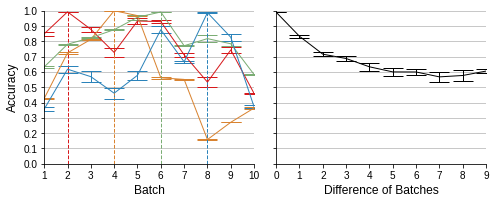

In [9]:
with open("output/single_network_accuracies.pkl", "rb") as f:
    all_accuracies = pickle.load(f)

colors = ['#d7191c', '#d98330', '#7bad74', '#2b83ba']
    
# Left plot
selected_batches = [1, 3, 5, 7]
fig, axes = plt.subplots(1, 2, figsize=(7.05, 3), sharey=True)
ax = axes[0]
for i, train_batch in enumerate(selected_batches):
    accuracies = all_accuracies[train_batch]
    errs = []
    means = []
    for batch in range(10):
        data = accuracies[:, batch]
        err = 1.96 * data.std() / math.sqrt(data.shape[0])
        mean = data.mean()
        errs.append(err)
        means.append(mean)
        
    ax.axvline(train_batch+1, c=colors[i], linestyle="--", linewidth=1)

    ax.errorbar(
        x=list(range(1, 11)),
        y=means,
        yerr=errs,
        c=colors[i],
#         label=dataset_names[i],
        capsize=10,
        linewidth=1,
        elinewidth=1,
        capthick=1,
    )

ax.set_ylabel("Accuracy")
ax.set_xlabel("Batch")
ax.set_ylim([0.0, 1.0])
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_xticks(np.arange(1, 11))
ax.grid(axis='y', color='#bbbbbb')

def flatten_and_index(arr):
    flat = []
    ind = []
    for i, sub in enumerate(arr):
        flat += sub
        ind += [i] * len(sub)
    return ind, flat
ax = axes[1]
accuracies_by_difference = [[] for _ in range(10)]
for train_batch in range(10):
    accuracies = all_accuracies[train_batch]
    for test_batch in range(10):
        data = accuracies[:, test_batch]
        difference = abs(train_batch-test_batch)
        accuracies_by_difference[difference] += data.tolist()
errs = []
means = []
for difference, accuracies in enumerate(accuracies_by_difference):
    err = 1.96 * np.std(accuracies) / math.sqrt(len(accuracies))
    mean = np.mean(accuracies)
    errs.append(err)
    means.append(mean)
ax.errorbar(
    x=list(range(10)),
    y=means,
    yerr=errs,
    c='black',
#         label=dataset_names[i],
    capsize=10,
    linewidth=1,
    elinewidth=1,
    capthick=1,
)

# x, y = flatten_and_index(accuracies_by_difference)
# ax.scatter(x, y, alpha=0.2)

ax.set_xticks(np.arange(10))
ax.grid(axis='y', color='#bbbbbb')
ax.set_xlabel("Difference of Batches")

fig.savefig("writeup/figure_sources/feedforward_centers.svg")
